In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("household_power_consumption.txt", sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'])

In [4]:
df.head()

,dt,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [5]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

## Data Preprocessing

In [6]:
df.isnull().sum()

dt                           0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

dt                       0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dt                     datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 140.7 MB


In [11]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


## Exploratoy Data Analysis

/Users/prasann/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasann/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/prasann/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

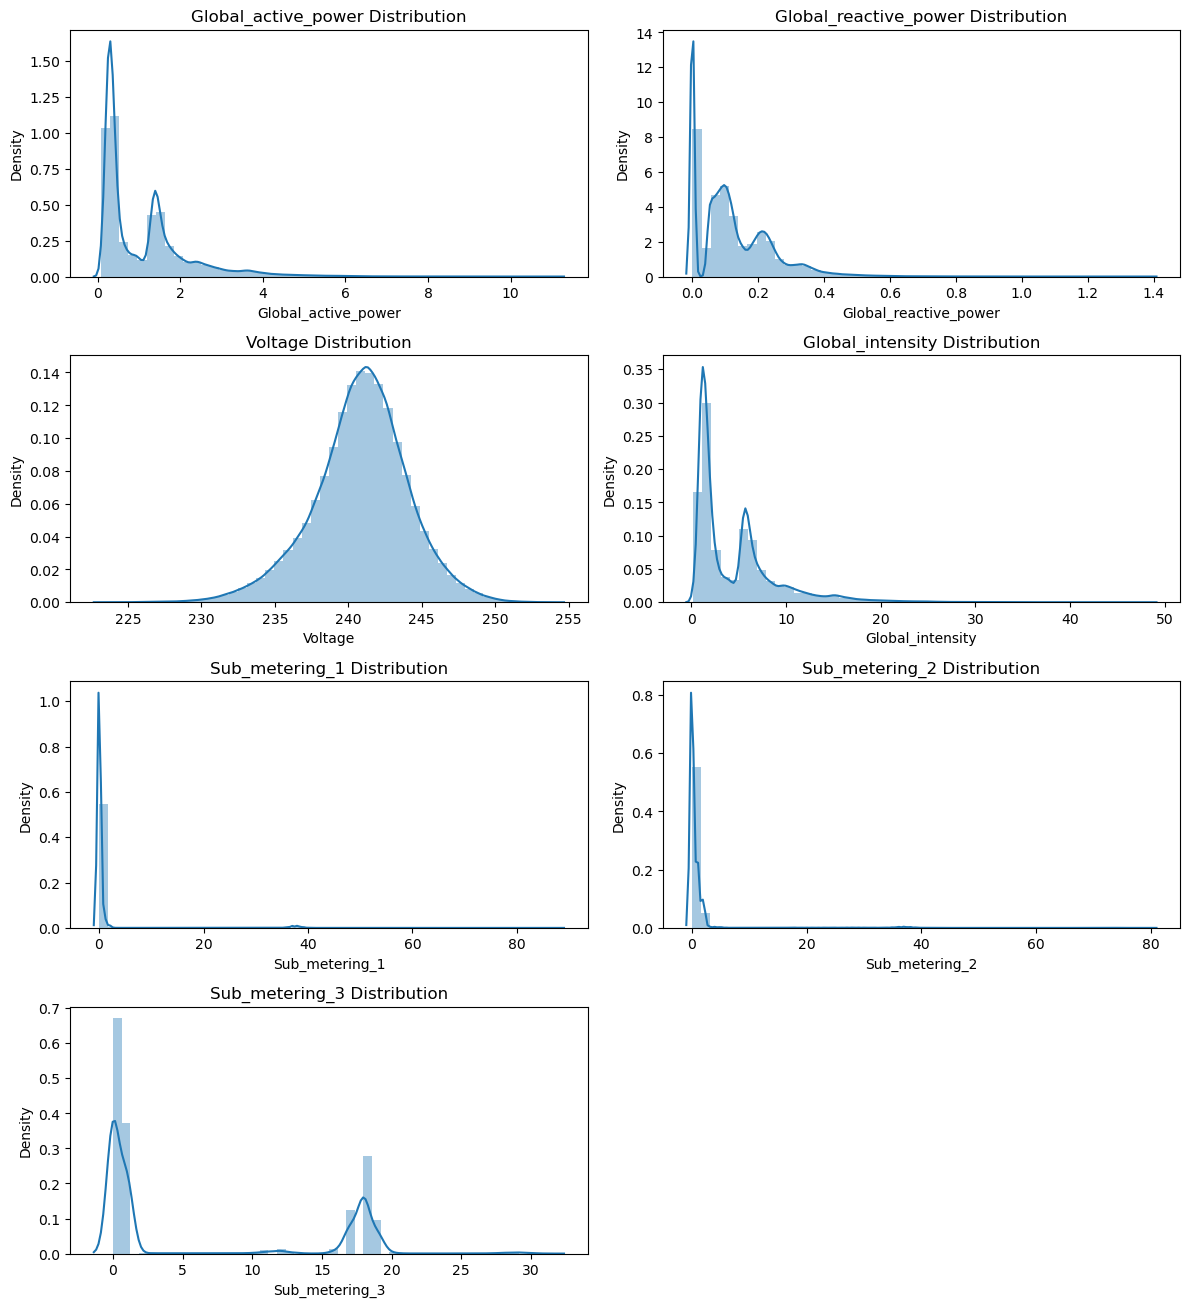

In [12]:
# Visualize the distribution of each variable.
plt.figure(figsize=(12,16))
for i, j in enumerate(df.describe().columns):
    plt.subplot(5,2, i+1)
    sns.distplot(x=df[j])
    plt.xlabel(j)
    plt.title('{} Distribution'.format(j))
    # plt.subplots_adjust(wspace=.2, hspace=.5)
    plt.tight_layout()
plt.show()

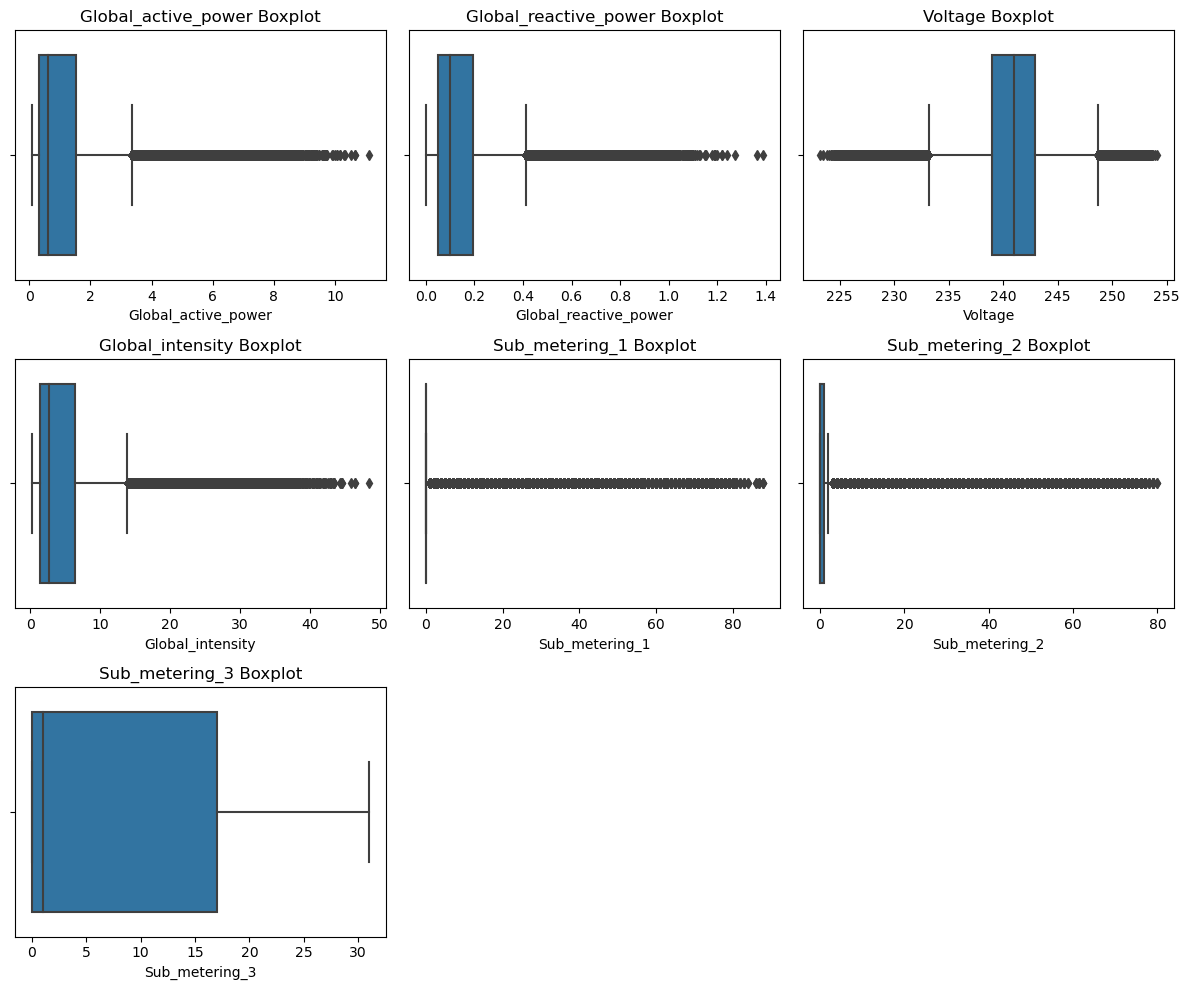

In [13]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(12,10))
for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()
    
plt.show()

In [14]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

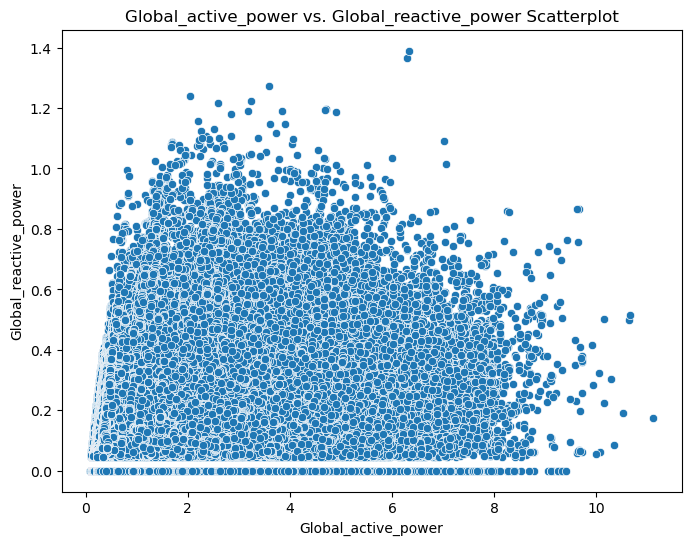

In [15]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df.Global_active_power, y=df.Global_reactive_power)
plt.title('Global_active_power vs. Global_reactive_power Scatterplot')
plt.show()

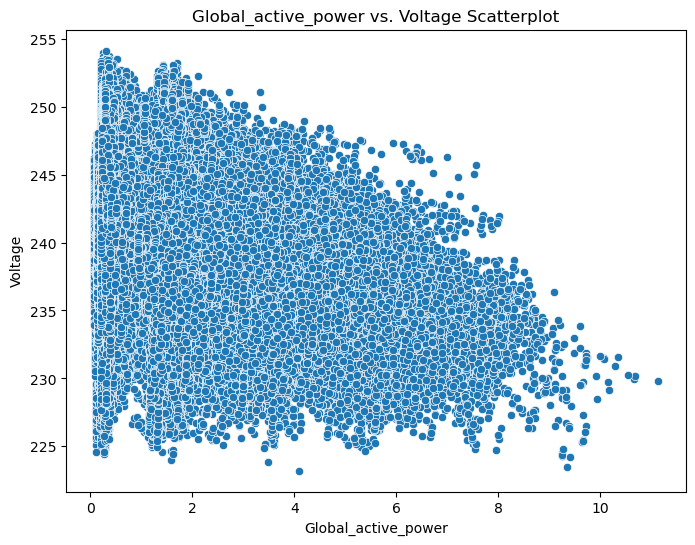

In [16]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df.Global_active_power, y=df.Voltage)
plt.title('Global_active_power vs. Voltage Scatterplot')
plt.show()

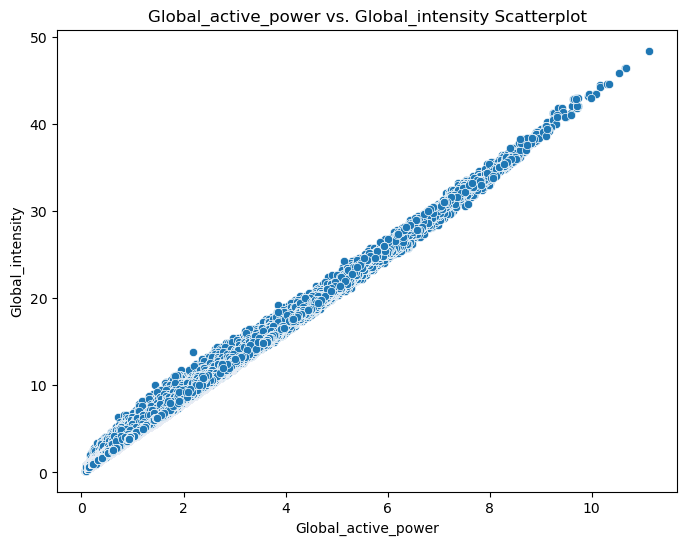

In [17]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df.Global_active_power, y=df.Global_intensity)
plt.title('Global_active_power vs. Global_intensity Scatterplot')
plt.show()

In [18]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

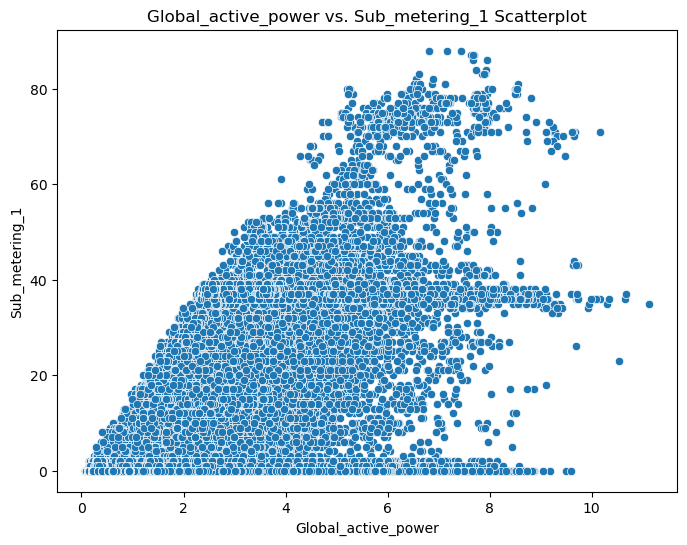

In [19]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df.Global_active_power, y=df.Sub_metering_1)
plt.title('Global_active_power vs. Sub_metering_1 Scatterplot')
plt.show()

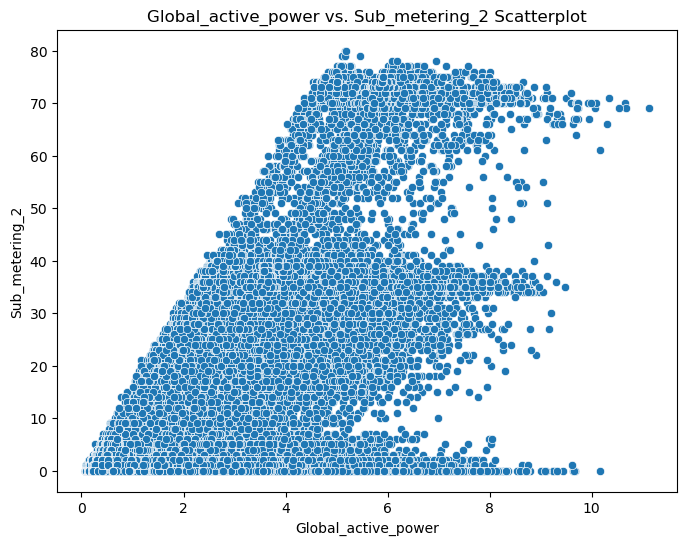

In [20]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df.Global_active_power, y=df.Sub_metering_2)
plt.title('Global_active_power vs. Sub_metering_2 Scatterplot')
plt.show()

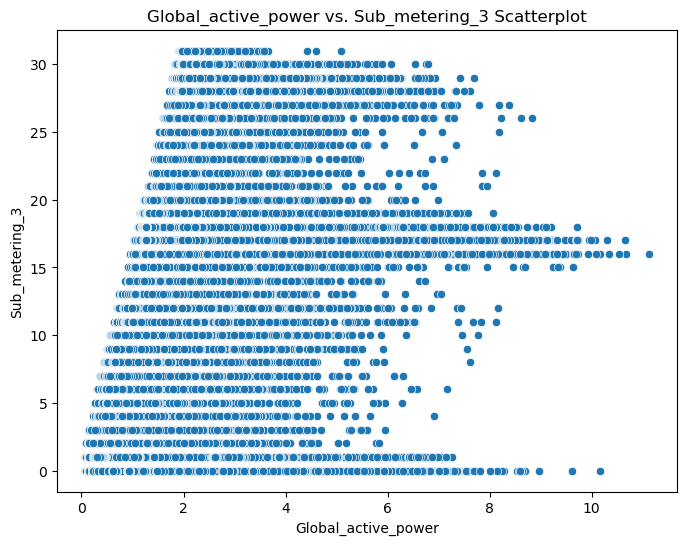

In [21]:
fig = plt.figure(figsize=(8,6))
sns.scatterplot(x=df.Global_active_power, y=df.Sub_metering_3)
plt.title('Global_active_power vs. Sub_metering_3 Scatterplot')
plt.show()

In [22]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


<AxesSubplot:>

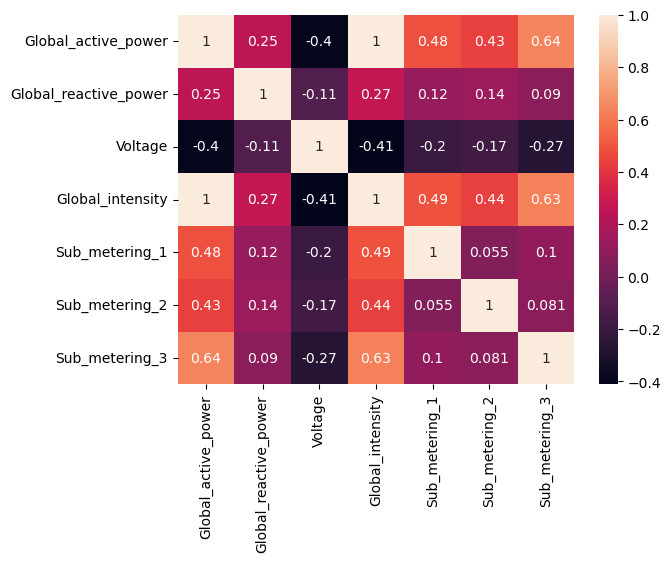

In [23]:
sns.heatmap(df.corr(),annot=True)

## Feature Selection and Preparation

In [24]:
df.columns

Index(['dt', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [25]:
df.drop('dt', axis=1, inplace=True)

In [26]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [27]:
# Scaling Data


from sklearn.preprocessing import StandardScaler

num_cols = df.columns
scaler = StandardScaler()

#for loop
for col in num_cols:
    df[col] = scaler.fit_transform(df[[col]])

In [28]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2.955077,2.610721,-1.851816,3.098789,-0.182337,-0.051274,1.249421
1,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897
2,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421
3,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421
4,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421
...,...,...,...,...,...,...,...
2075254,-0.137724,-1.097519,-0.126500,-0.141247,-0.182337,-0.223036,-0.765477
2075255,-0.139616,-1.097519,-0.259217,-0.141247,-0.182337,-0.223036,-0.765477
2075256,-0.145291,-1.097519,-0.314772,-0.186248,-0.182337,-0.223036,-0.765477
2075257,-0.149074,-1.097519,-0.351810,-0.186248,-0.182337,-0.223036,-0.765477


### Principal Component Analysis

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
df_reduced= pca.fit_transform(df)
df_reduced.shape

(2049280, 5)

## Model Creation

### KMeans

In [30]:
df_reduced

array([[ 4.69636674,  0.68451311,  0.16833779, -2.12535205,  0.5938945 ],
       [ 5.93363569,  0.70167952,  0.18195805, -2.09915509,  0.6623514 ],
       [ 6.16438171,  1.10186453,  0.24303295, -2.4214851 ,  0.738271  ],
       ...,
       [-0.6885466 , -0.5449111 , -0.19139234,  0.81726289,  0.53123582],
       [-0.67961526, -0.54999151, -0.1934843 ,  0.81526414,  0.56663483],
       [-0.66692423, -0.55648707, -0.19618377,  0.81289274,  0.61043334]])

In [31]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


X = df_reduced

# Define the number of clusters
n_clusters = 3

# Initialize KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

labels = kmeans.predict(X)

In [32]:
labels

array([1, 2, 2, ..., 0, 0, 0], dtype=int32)

In [33]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

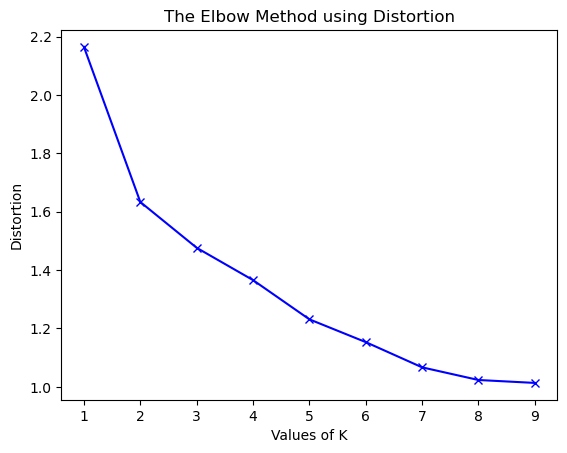

In [34]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

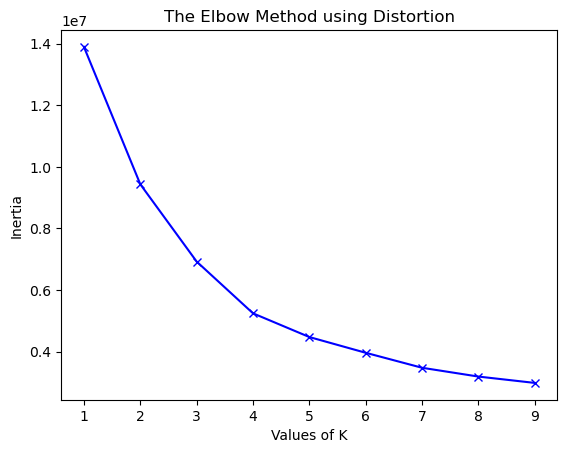

In [35]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.ylabel('Inertia')
plt.title('The Elbow Method using Distortion')
plt.show()

In [36]:
len(df_reduced)

2049280

In [37]:
# Silhouette analysis

from sklearn.metrics import silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
X = pd.DataFrame(df_reduced).sample(n=20000)

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.40981628584281354
For n_clusters=3, the silhouette score is 0.4297814055529301
For n_clusters=4, the silhouette score is 0.44771256856756836
For n_clusters=5, the silhouette score is 0.36784748795078104
For n_clusters=6, the silhouette score is 0.3456375151816717
For n_clusters=7, the silhouette score is 0.31899014807566833
For n_clusters=8, the silhouette score is 0.3044949617594251


In [38]:
#  Optimal Number of clusters is 4

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


X = df_reduced

# Define the number of clusters
n_clusters = 4

# Initialize KMeans algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit KMeans to the data
kmeans.fit(X)

kmeans_labels = kmeans.predict(X)

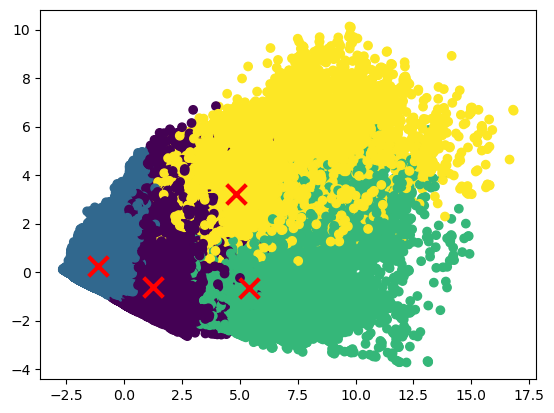

In [39]:
plt.scatter([x[0] for x in X], [x[1] for x in X], c=kmeans.labels_)
plt.scatter([x[0] for x in kmeans.cluster_centers_], [x[1] for x in kmeans.cluster_centers_], marker='x', s=200, linewidths=3, color='r')
plt.show()

In [40]:
df['cluster_ID'] = kmeans.labels_

In [41]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster_ID
0,2.955077,2.610721,-1.851816,3.098789,-0.182337,-0.051274,1.249421,0
1,4.037085,2.770406,-2.225274,4.133800,-0.182337,-0.051274,1.130897,0
2,4.050326,3.320432,-2.330213,4.133800,-0.182337,0.120487,1.249421,0
3,4.063567,3.355917,-2.191324,4.133800,-0.182337,-0.051274,1.249421,0
4,2.434881,3.586573,-1.592556,2.513782,-0.182337,-0.051274,1.249421,0


In [42]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'cluster_ID'],
      dtype='object')

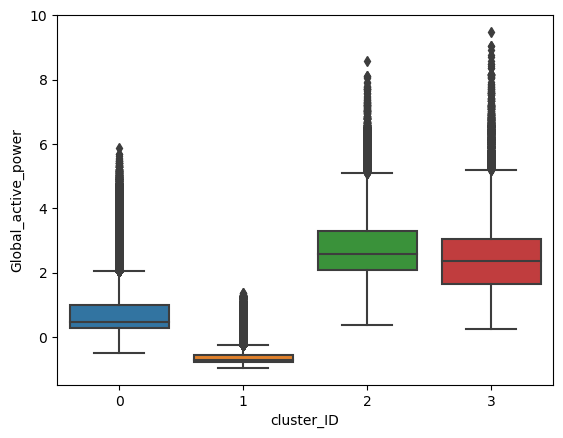

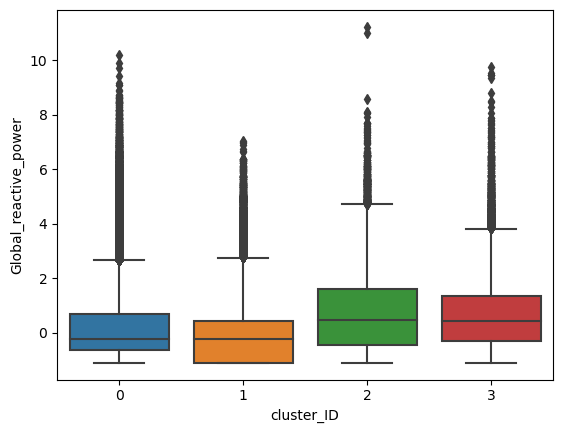

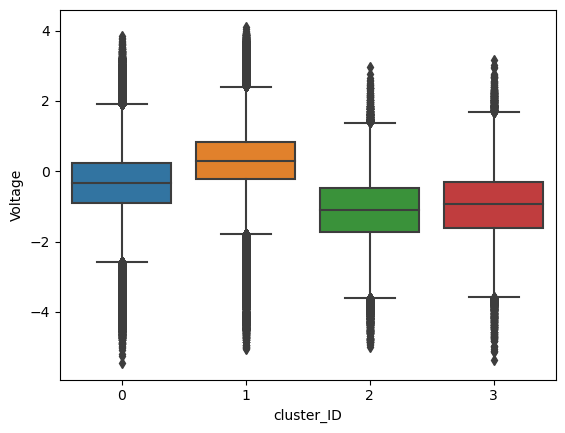

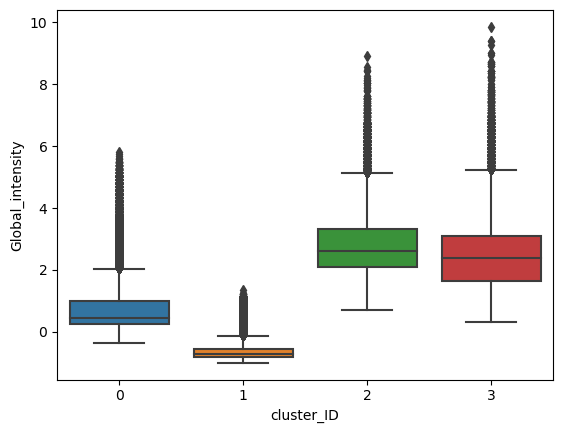

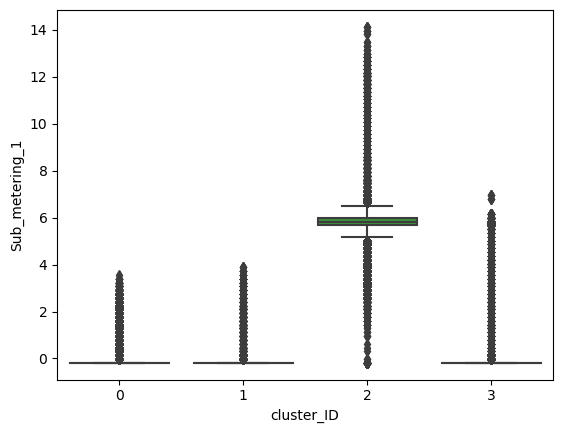

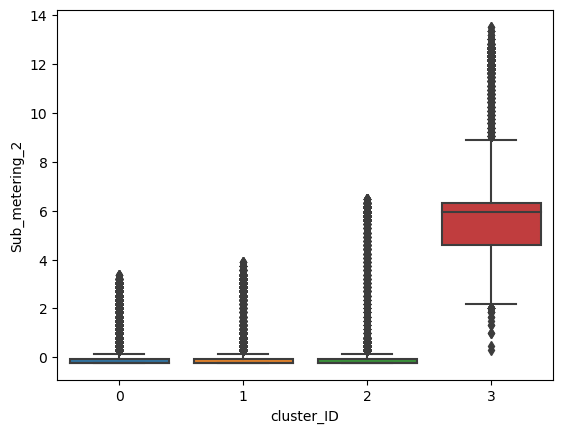

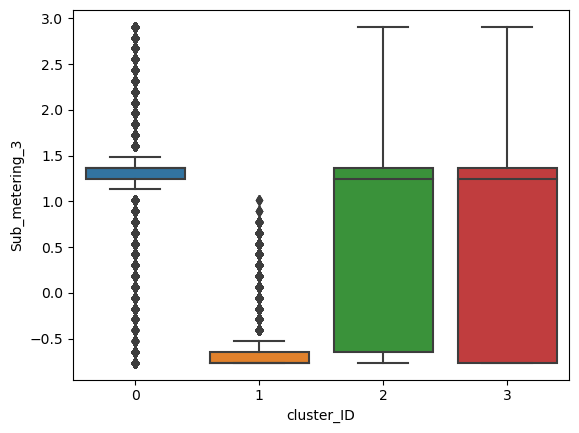

In [43]:
for y in ['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity', 'Sub_metering_1', 'Sub_metering_2','Sub_metering_3']:
    sns.boxplot(x='cluster_ID', y=y, data=df)
    plt.show()
    
    

### Heirarchichal Clustering

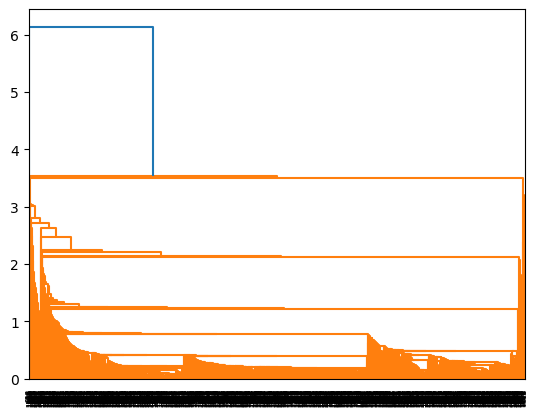

In [44]:
# Single linkage: 

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

X = pd.DataFrame(df.drop('cluster_ID', axis=1)).sample(2000)

mergings = linkage(X, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

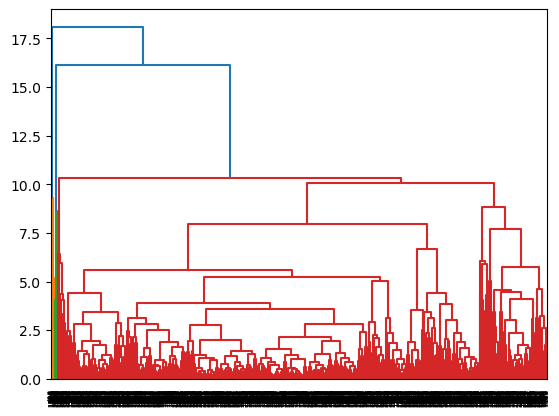

In [45]:
# Complete linkage

mergings = linkage(X, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

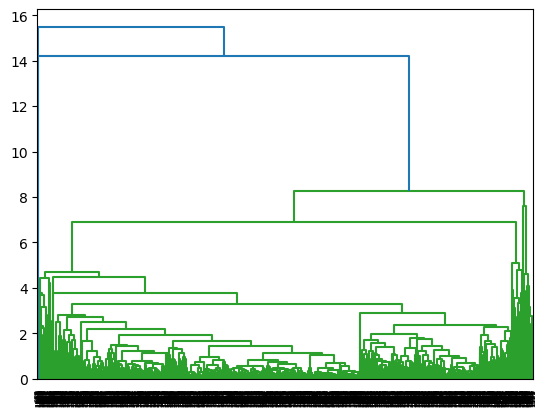

In [46]:
# Average linkage

mergings = linkage(X, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [47]:
from scipy.cluster.hierarchy import cut_tree

In [48]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
len(X)

2000

In [50]:
len(cluster_labels)

2000

In [51]:
# Assign cluster labels

X['Cluster_Labels'] = cluster_labels
X.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Cluster_Labels
2055480,-0.654137,0.250932,1.071036,-0.636253,-0.182337,-0.223036,-0.765477,0
1972902,-0.045035,0.747729,-0.746873,-0.051246,-0.182337,-0.051274,-0.765477,0
1767966,0.242492,-1.097519,0.006217,0.218757,-0.182337,-0.223036,1.486468,0
291117,4.986679,0.854186,-1.342555,5.033810,-0.019815,11.800272,1.249421,1
430048,0.711614,0.339646,-1.487617,0.713762,-0.182337,-0.223036,1.249421,0


In [52]:
X.Cluster_Labels.unique()

array([0, 1, 2, 3])

In [53]:
X.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Cluster_Labels'],
      dtype='object')

In [54]:
X.Cluster_Labels.value_counts()

0    1947
2      46
1       6
3       1
Name: Cluster_Labels, dtype: int64

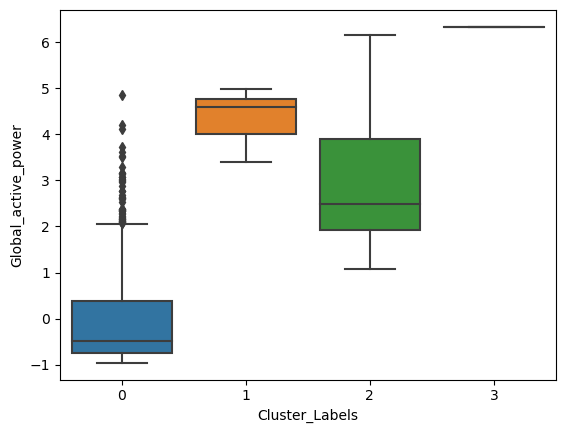

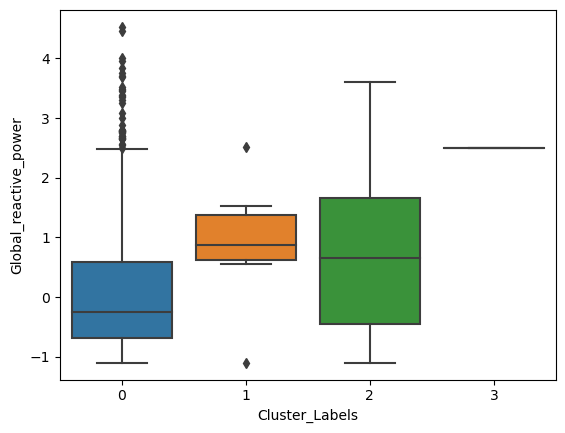

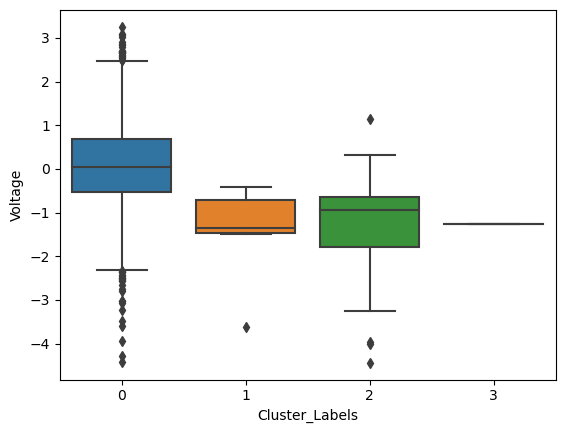

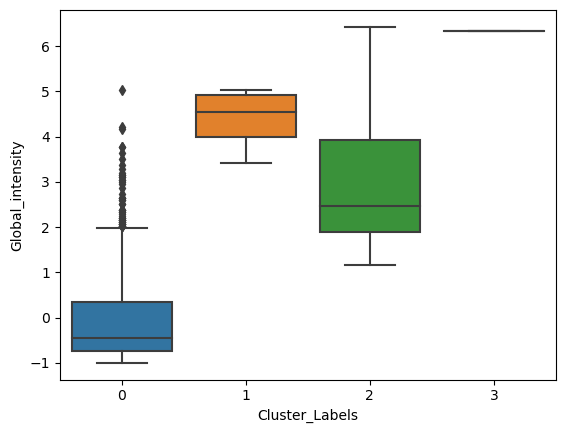

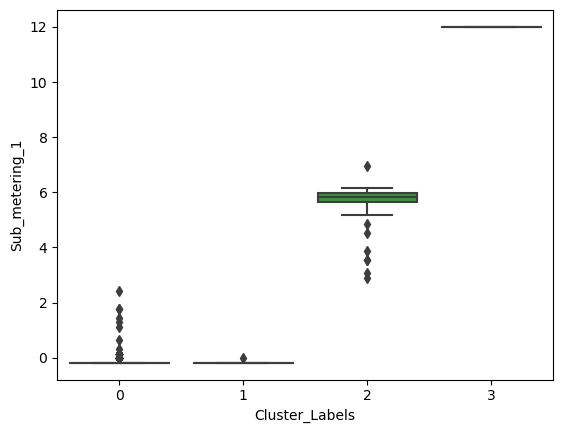

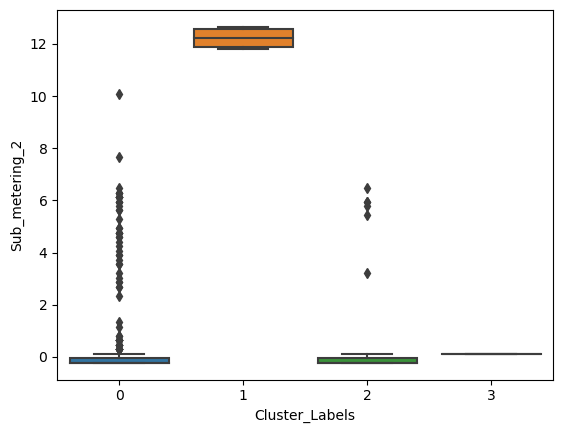

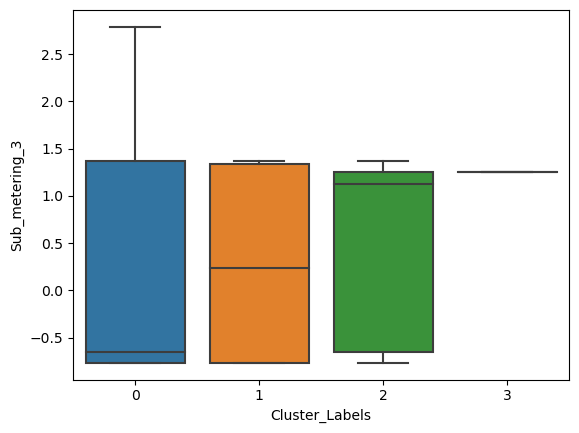

In [55]:
for y in X.drop('Cluster_Labels',axis=1).columns:
    
    sns.boxplot(x='Cluster_Labels', y=y, data=X)
    plt.show()

In [56]:
import scipy.cluster.hierarchy as sch
X = df.sample(n=20000)
linkage_matrix = sch.linkage(X, method = 'complete')

Text(0, 0.5, 'Euclidian Distances')

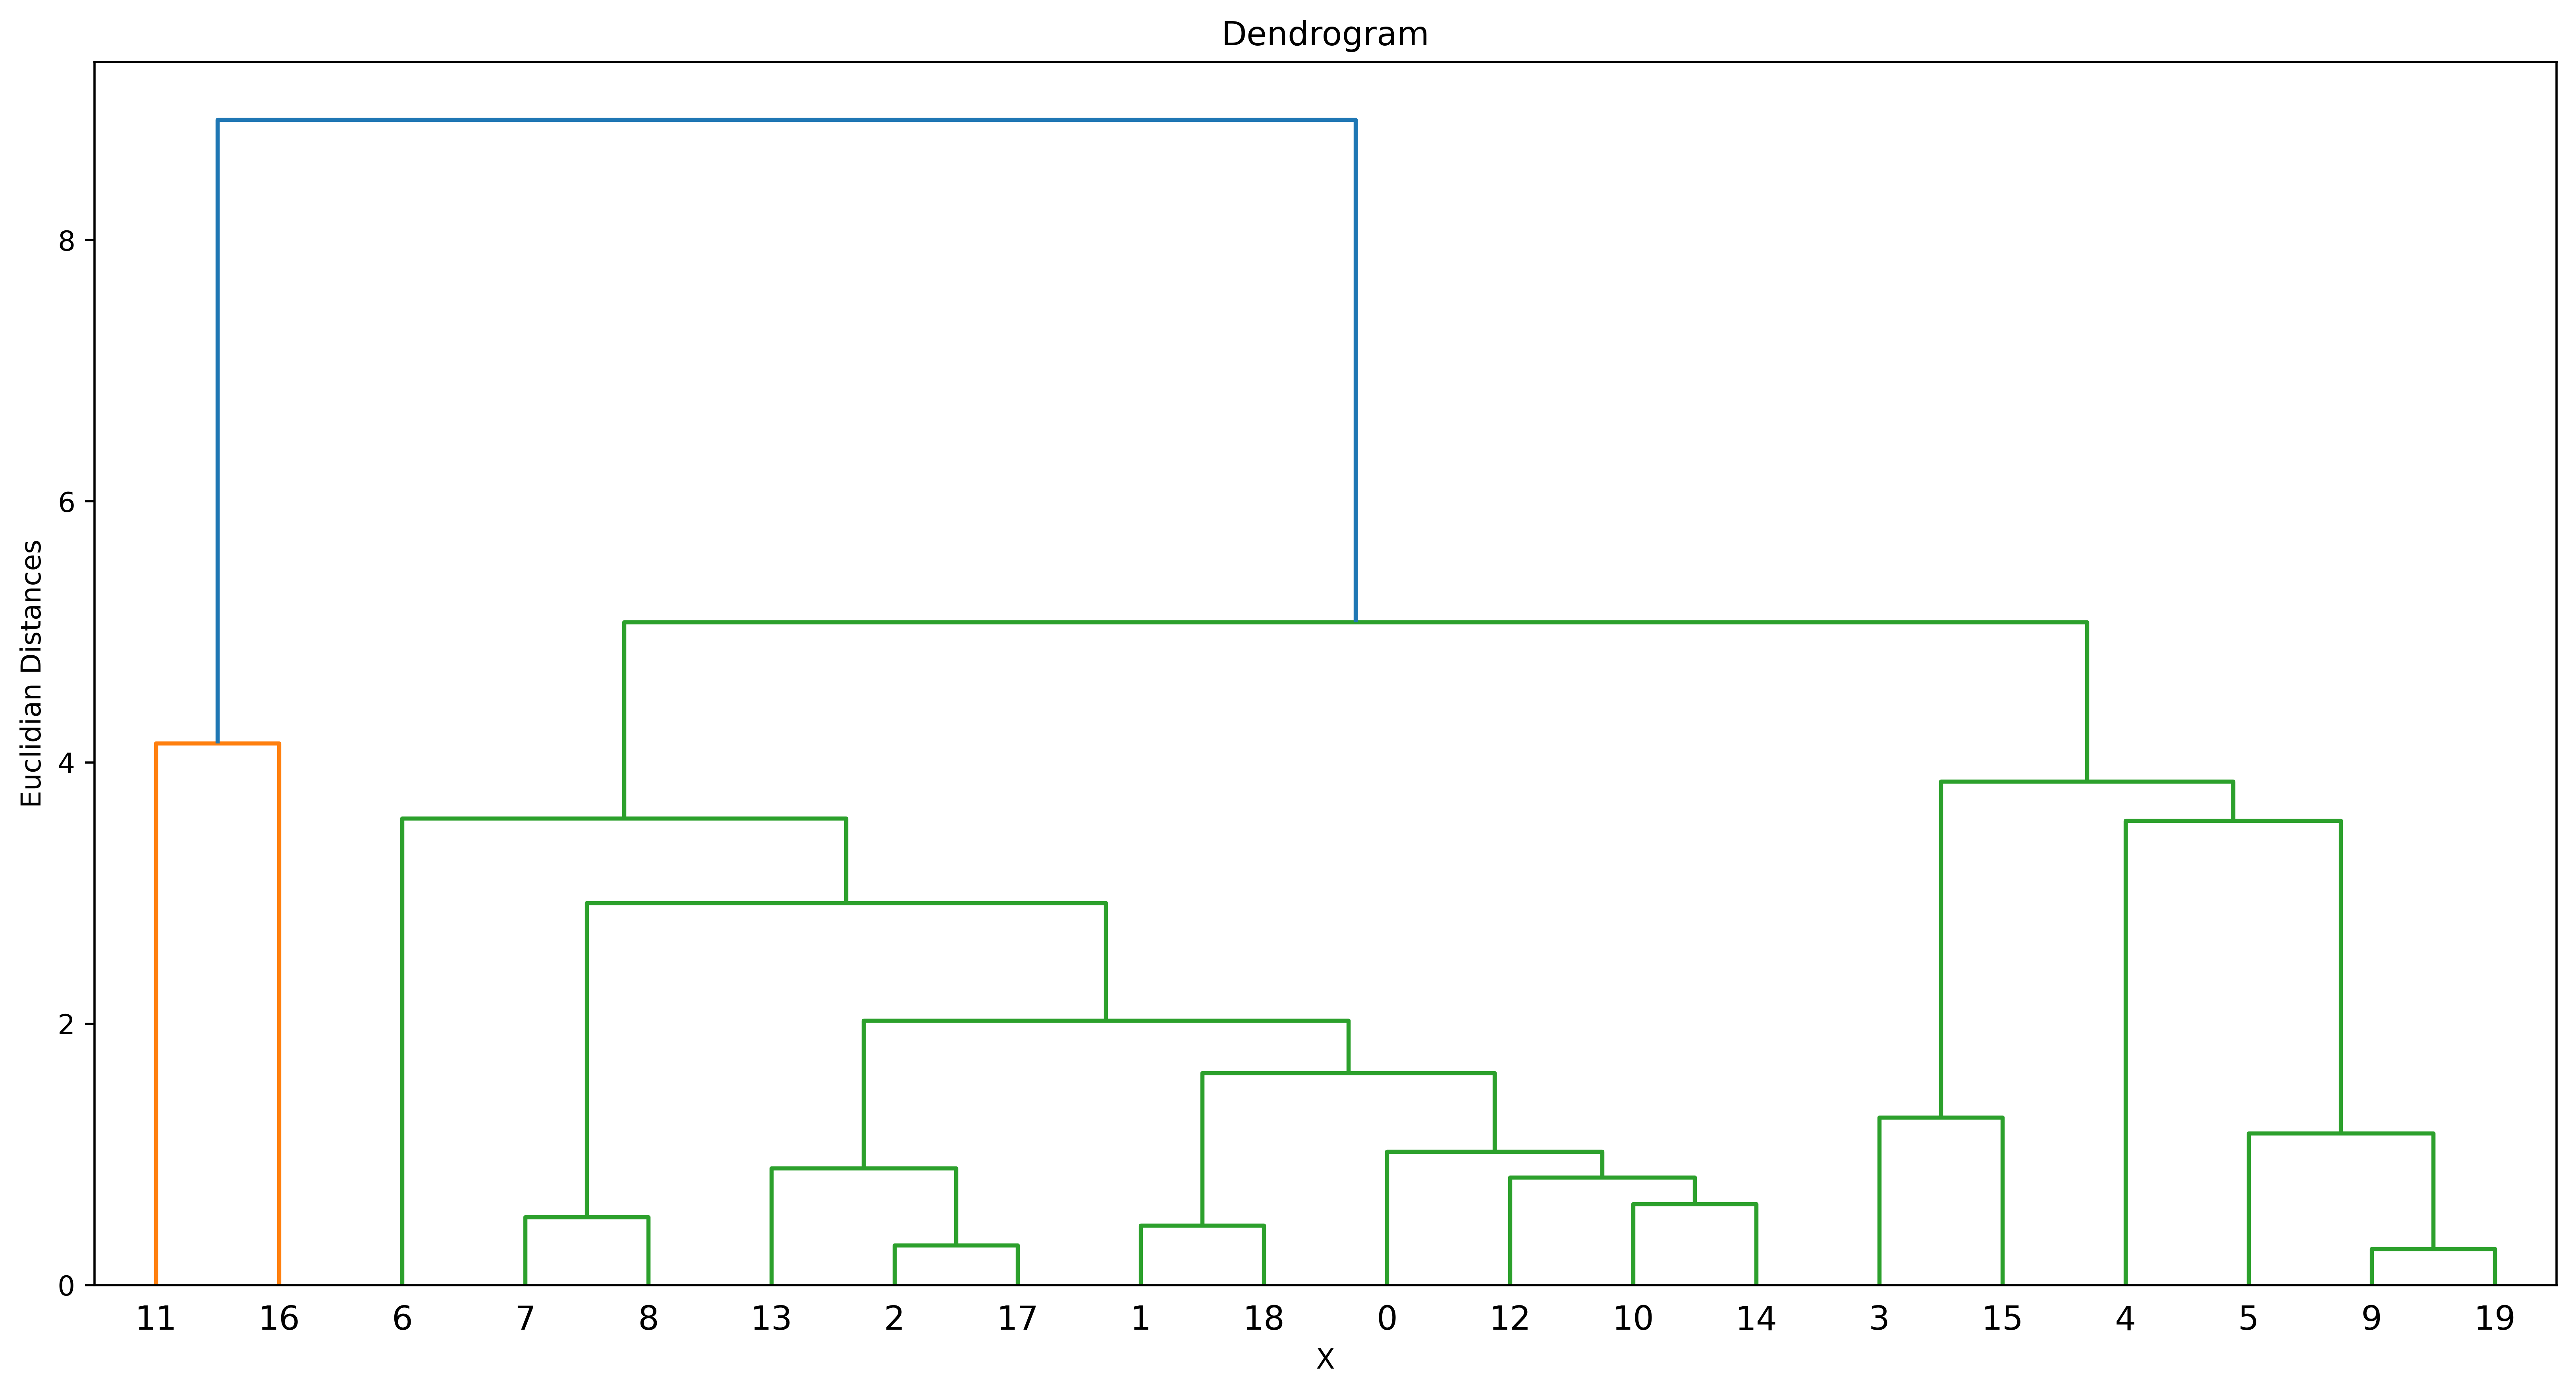

In [60]:
plt.figure(figsize = (16,8), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('X')
plt.ylabel('Euclidian Distances')

Text(0, 0.5, 'Euclidian Distances')

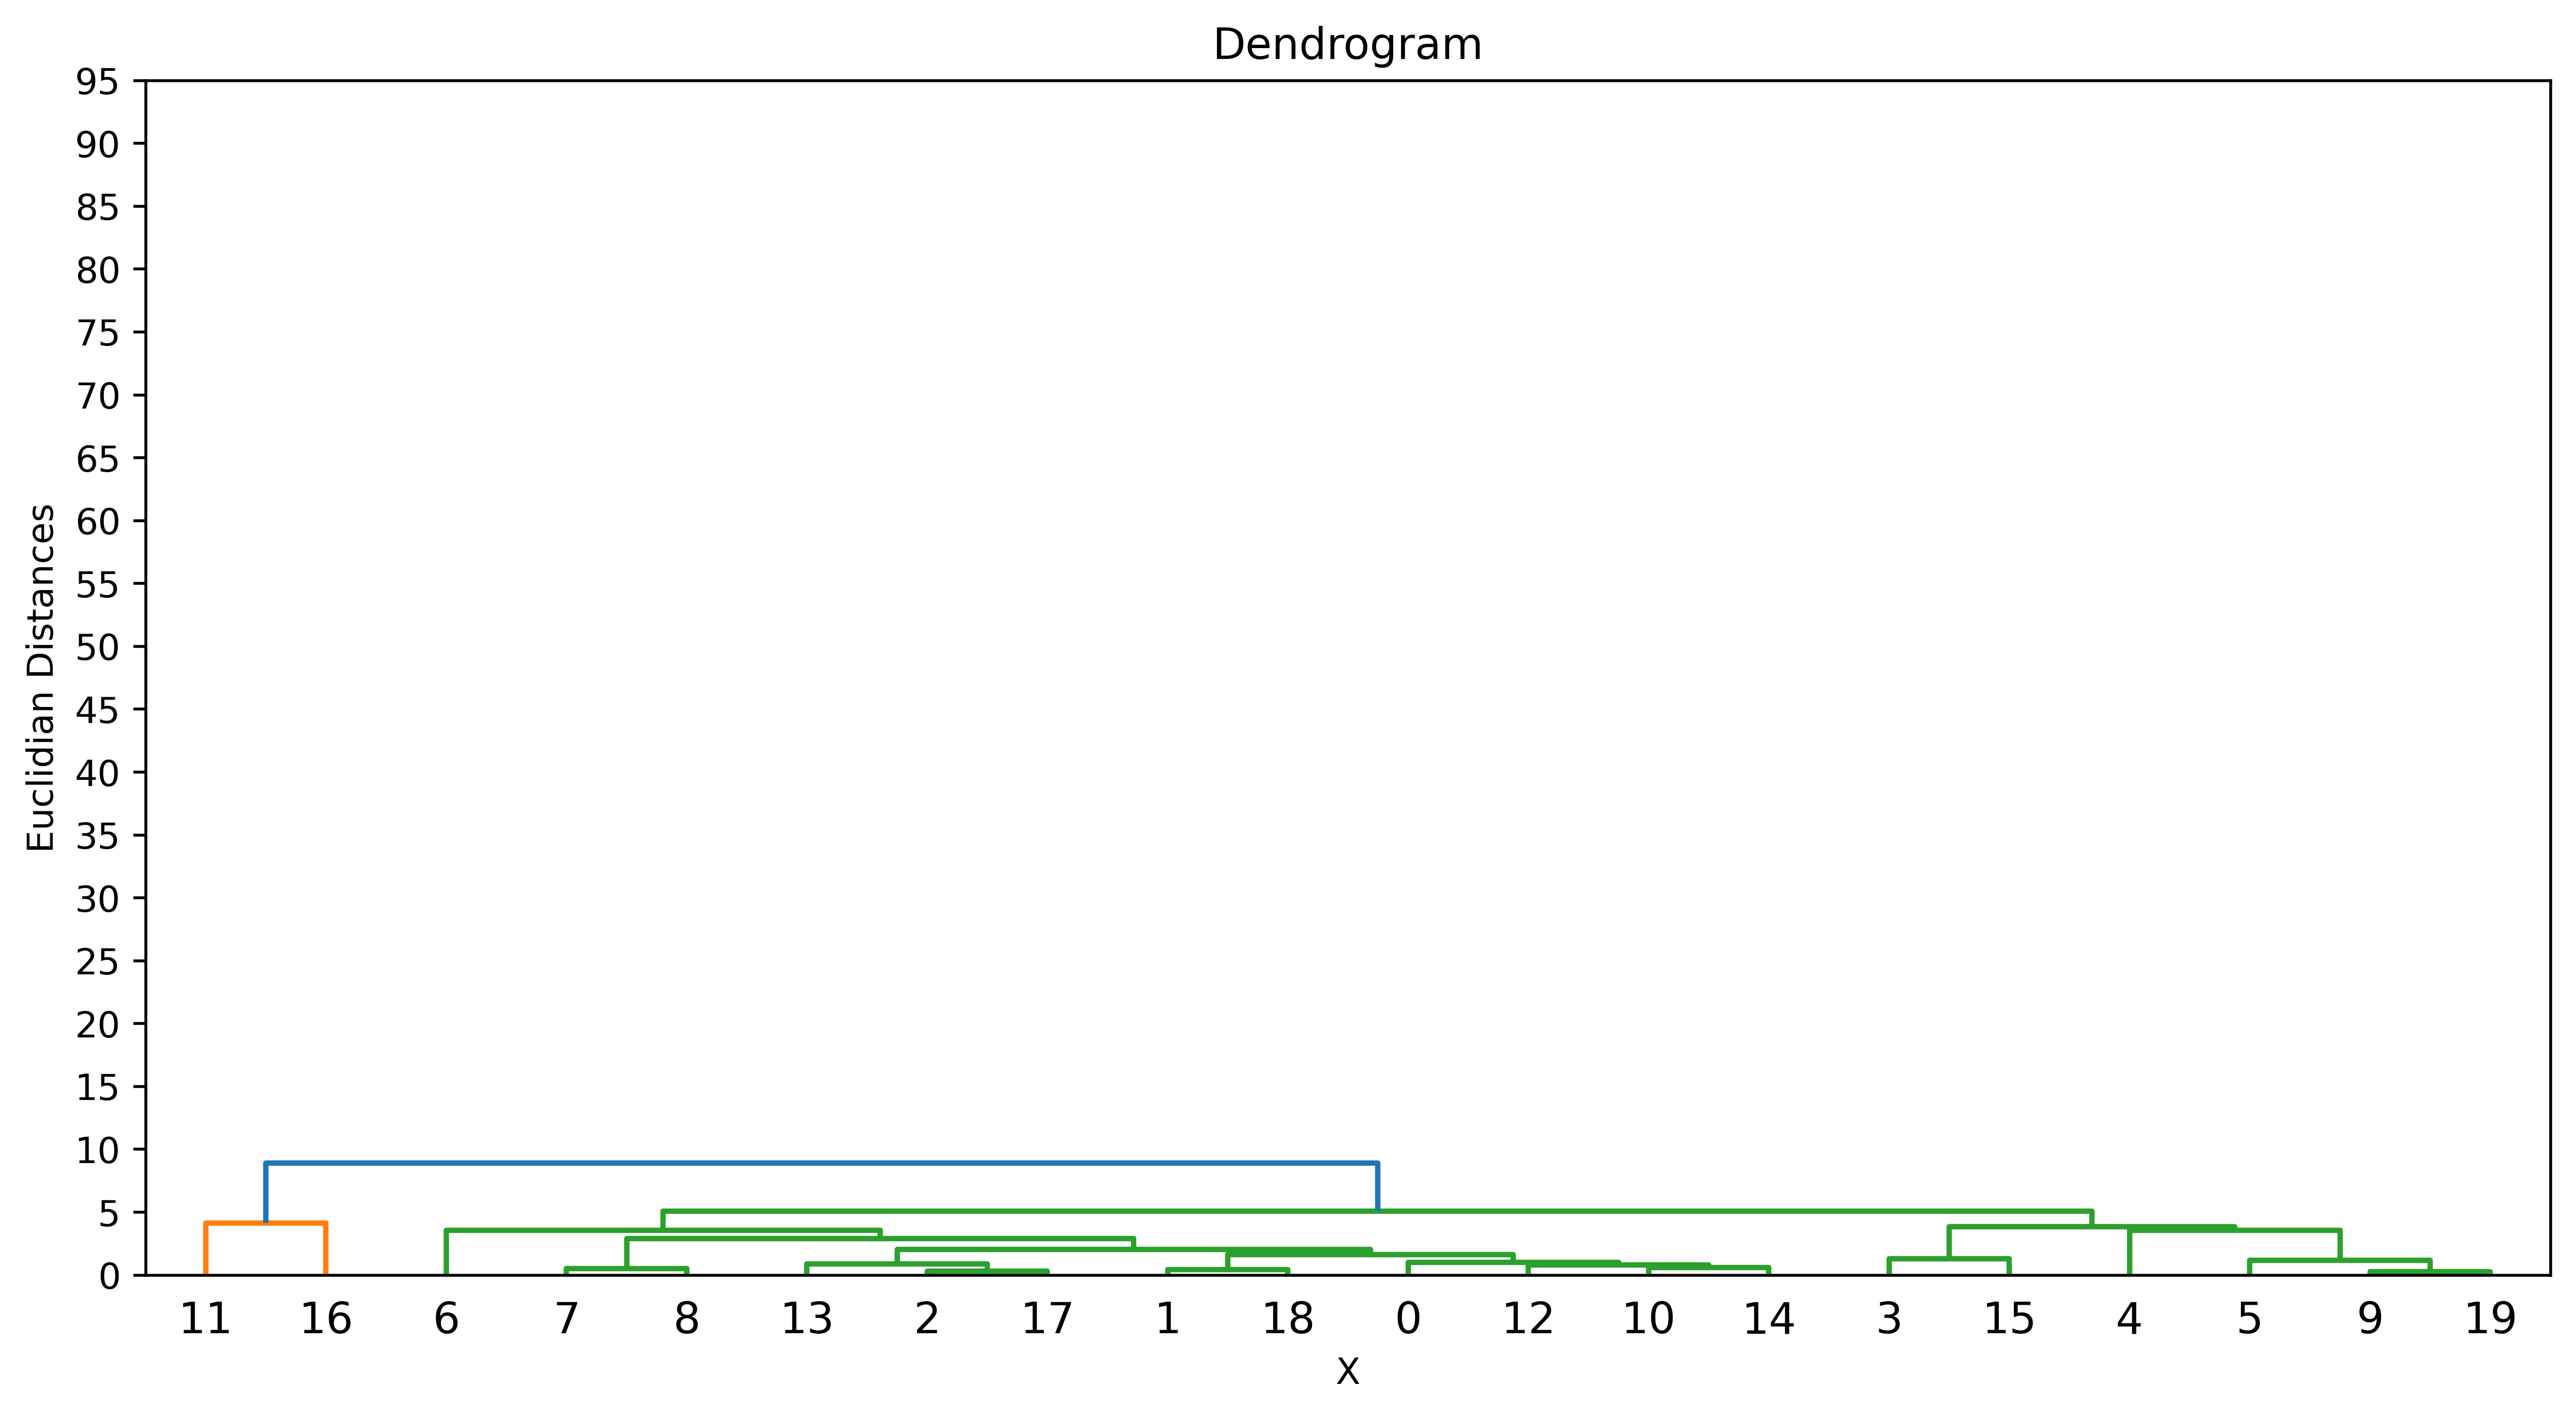

In [58]:
# Plotting a small portion of data to understand dendrogram
import scipy.cluster.hierarchy as sch
linkage_matrix = sch.linkage(X[:20], method = 'complete')

plt.figure(figsize = (12,6), dpi = 500)
dendrogm = sch.dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('X')
plt.yticks(range(0,100,5))
plt.ylabel('Euclidian Distances')

### Agglomerative Clustering

In [61]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'complete')
y_hc = hc.fit_predict(X)
y_hc

array([0, 0, 0, ..., 0, 0, 0])

In [68]:
pd.DataFrame(y_hc)[0].unique()

array([0, 1, 3, 2])

In [71]:
X['y_hc'] = y_hc

In [72]:
X.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'cluster_ID', 'y_hc'],
      dtype='object')

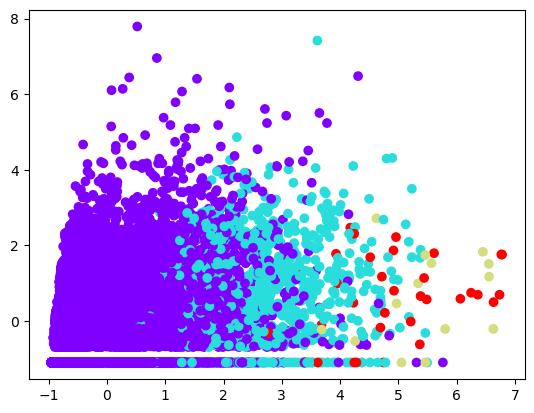

In [82]:
plt.scatter(X['Global_active_power'], X['Global_reactive_power'], c=hc.labels_, cmap='rainbow')
plt.show()

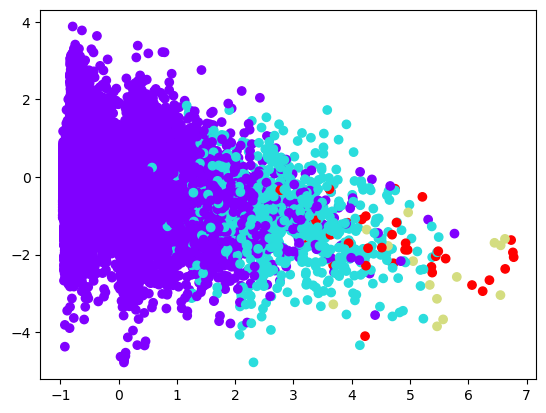

In [83]:
plt.scatter(X['Global_active_power'], X['Voltage'], c=hc.labels_, cmap='rainbow')
plt.show()

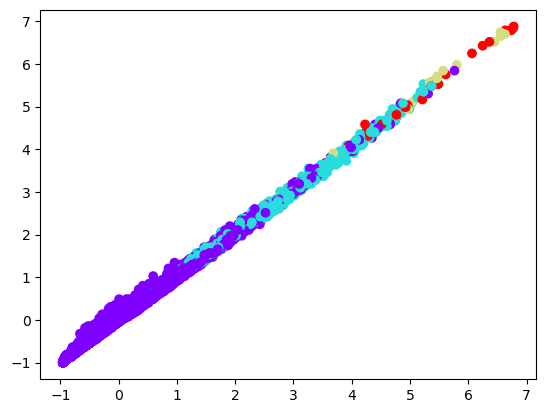

In [84]:
plt.scatter(X['Global_active_power'], X['Global_intensity'], c=hc.labels_, cmap='rainbow')
plt.show()

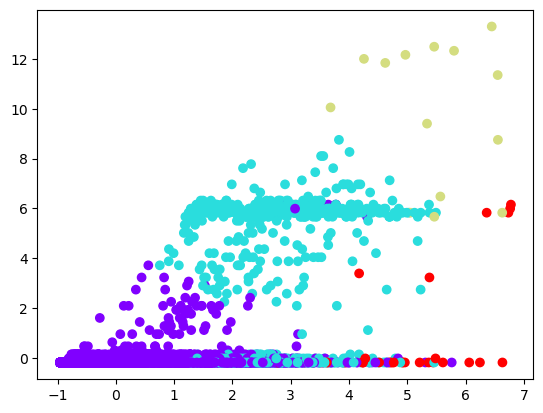

In [85]:
plt.scatter(X['Global_active_power'], X['Sub_metering_1'], c=hc.labels_, cmap='rainbow')
plt.show()

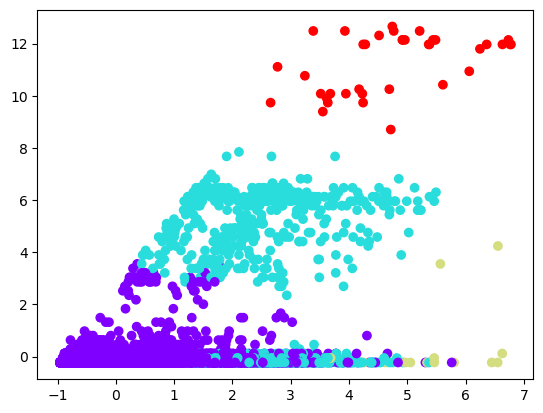

In [86]:
plt.scatter(X['Global_active_power'], X['Sub_metering_2'], c=hc.labels_, cmap='rainbow')
plt.show()

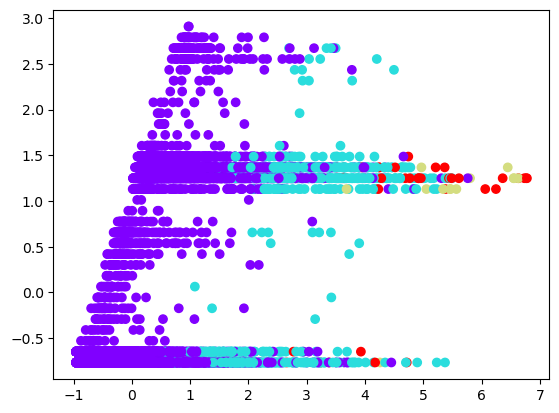

In [87]:
plt.scatter(X['Global_active_power'], X['Sub_metering_3'], c=hc.labels_, cmap='rainbow')
plt.show()